## Library Imports

In [94]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


#from tensorflow.keras.models import Model
#from tensorflow.keras.models import load_model
from tensorflow.keras import layers, activations
from tensorflow.keras.layers import *
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
#from tensorflow.keras.layers import TextVectorization
#from tensorflow.keras.optimizers import *


import sklearn as sk
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import itertools
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [95]:
#pip install keras-tuner

In [96]:
# Importieren der notwendigen Module für das Netzwerk
import numpy as np        
import pandas as pd
import keras
import keras_tuner
import matplotlib.pyplot as plt
import tensorflow
import time
LOG_DIR = f"{int(time.time())}"

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras.callbacks import History
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

# Import Data

First the data, which is to be analyzed and later used for training the model is imported.
Hereby needs the link within the brackets to be changed accordingly to the directory where the csv file is stored. 

In [97]:
df = pd.read_csv("/Users/kpauler/Documents/HS Aalen /Semester 1/Text Mining & Time Series Analysis/Projekt/labeled_data.csv")

Following we take an first look at the imported data

In [98]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


The dataset selected for training the model contains 7 columns and almost 25.000 rows of data. Hereby are the text passages differentiated into 3 different classes: hate_speech, offensive_language or neither.

# Preprocessing

# Tokenizer

Tokenize all words contained in the Tweets of the Dataset.

The Tweets are stored in the dataframe df (column "tweet")

In [99]:
#Split String for each word
def toLowerAndSplit(tweet):
    tweet = tweet.lower()
    tweet = tweet.split()
    return tweet

In [100]:
tweets = pd.DataFrame(df["tweet"].apply(toLowerAndSplit))

The method defined splits every word and moves it to lower cases, so the individual words contained within the tweet become individual analyzable.

In [101]:
tweets

,tweet
0,"[!!!, rt, @mayasolovely:, as, a, woman, you, s..."
1,"[!!!!!, rt, @mleew17:, boy, dats, cold...tyga,..."
2,"[!!!!!!!, rt, @urkindofbrand, dawg!!!!, rt, @8..."
3,"[!!!!!!!!!, rt, @c_g_anderson:, @viva_based, s..."
4,"[!!!!!!!!!!!!!, rt, @shenikaroberts:, the, shi..."
...,...
24778,"[you's, a, muthaf***in, lie, &#8220;@lifeaskin..."
24779,"[you've, gone, and, broke, the, wrong, heart, ..."
24780,"[young, buck, wanna, eat!!.., dat, nigguh, lik..."
24781,"[youu, got, wild, bitches, tellin, you, lies]"


In [102]:
#Create a list containing all words mentioned in tweets
all_words = list(itertools.chain(*tweets["tweet"]))

In [103]:
all_words

['!!!',
 'rt',
 '@mayasolovely:',
 'as',
 'a',
 'woman',
 'you',
 "shouldn't",
 'complain',
 'about',
 'cleaning',
 'up',
 'your',
 'house.',
 '&amp;',
 'as',
 'a',
 'man',
 'you',
 'should',
 'always',
 'take',
 'the',
 'trash',
 'out...',
 '!!!!!',
 'rt',
 '@mleew17:',
 'boy',
 'dats',
 'cold...tyga',
 'dwn',
 'bad',
 'for',
 'cuffin',
 'dat',
 'hoe',
 'in',
 'the',
 '1st',
 'place!!',
 '!!!!!!!',
 'rt',
 '@urkindofbrand',
 'dawg!!!!',
 'rt',
 '@80sbaby4life:',
 'you',
 'ever',
 'fuck',
 'a',
 'bitch',
 'and',
 'she',
 'start',
 'to',
 'cry?',
 'you',
 'be',
 'confused',
 'as',
 'shit',
 '!!!!!!!!!',
 'rt',
 '@c_g_anderson:',
 '@viva_based',
 'she',
 'look',
 'like',
 'a',
 'tranny',
 '!!!!!!!!!!!!!',
 'rt',
 '@shenikaroberts:',
 'the',
 'shit',
 'you',
 'hear',
 'about',
 'me',
 'might',
 'be',
 'true',
 'or',
 'it',
 'might',
 'be',
 'faker',
 'than',
 'the',
 'bitch',
 'who',
 'told',
 'it',
 'to',
 'ya',
 '&#57361;',
 '!!!!!!!!!!!!!!!!!!"@t_madison_x:',
 'the',
 'shit',
 'just',


## Count Words

In [105]:
# Count of every word
word_counts = Counter(all_words)

# Identification of the most common words used in the tweets and transforming
# them in order to visualize the words
df_uncleaned = pd.DataFrame(word_counts.most_common(10))

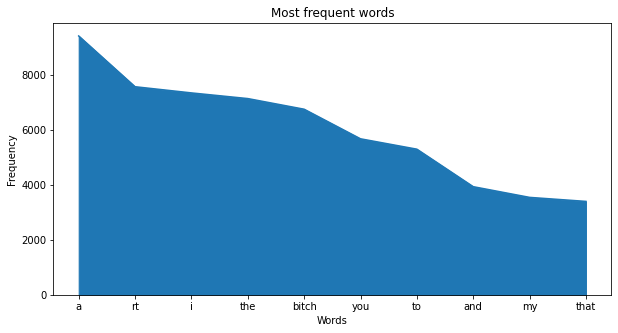

In [12]:
df_uncleaned.plot(kind = "area",
             title = "Most frequent words", 
             legend = False,
             xlabel = "Words",
             ylabel = "Frequency",
             figsize = (10, 5))
plt.xticks(range(0,len(df_uncleaned.index)), df_uncleaned[0])
plt.show()

This graph is showing the most used words in the tweets of the dataset. Observable is, that many of the most frequent words are stopwords like "a", "i", "the", which are not important for our further analysis. 

## Remove stopwords

To gain more substantial insight into the data, stopwords such as "i", "a", "at", "the" have to be removed. These words construct the grammatical dependencies of the english language, but do not contain any relevant information to determine hate speech.

## Remove Tags

Twitter tags such as @genericUser do not give further insight for hate speech detection purposes. Thus, they have to be removed.

## Remove Links

Similar to stopwords and Tags, links do not add meaningfull information to the purpose of hate speech --> remove

## Remove Twitter Elements

The Tweets can contain Twitter excluvsive information, such as "rt", "rts" or "retweet". These formulations do not add any meaning to the Tweets content and have therefore to be removed.

In [13]:
#Uncomment if nltk stopwords were not downloaded yet
#nltk.download('stopwords')

This provides a link of the most common stopwords of the english language, which will be used to identify and then remove the stoppwords within the tweets.

In the variables, several stop words of the english language are defined. The function uses theses to iterate through the given word list and remove all these step words.

In [14]:
#Define variable with english stopwords
sw = stopwords.words("english")
twitter_elements = ["rt", "rts", "retweet"]
i_elements = ["i", "i'm", "im", "iam"] # remove u?
most_common = word_counts.most_common()


def removeNoiseWordCount(word_list):
    cleaned_word_list = []
    for element in word_list:
        #Removes words contained in stopwords
        if element[0] not in sw:
            #Removes words with @ --> remove Tags
            if "@" not in element[0]: 
                #Removes words containing http --> links
                if "http" not in element[0]:
                    hasTwitterElement = False
                    hasIElement = False
                    for tw in twitter_elements:
                        if tw in element:
                            hasTwitterElement = True
                    for ie in i_elements:
                        if ie in element:
                            hasIElement = True
                    if hasTwitterElement == False and hasIElement == False:
                        cleaned_word_list.append(element)

    return cleaned_word_list

Call of the function and handing it the list of words defined earlier. 

In [15]:
cleaned_word_list_complete = removeNoiseWordCount(most_common)

Identification of the most used words within the tweets after removing stop words and further unimportant elements. 

In [106]:
df_cleaned_top10 = pd.DataFrame(cleaned_word_list_complete[:10])

In [107]:
df_cleaned_top10

,0,1
0,bitch,6749
1,bitches,2677
2,like,2674
3,hoes,1977
4,pussy,1731
5,hoe,1483
6,ass,1472
7,get,1413
8,fuck,1311
9,got,1275


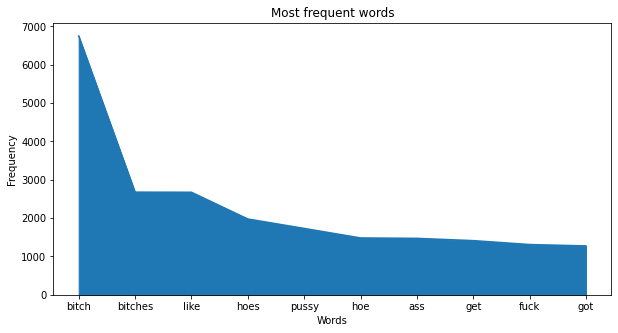

In [18]:
df_cleaned_top10.plot(kind = "area",
             title = "Most frequent words", 
             legend = False,
             xlabel = "Words",
             ylabel = "Frequency",
             figsize = (10, 5))
plt.xticks(range(0,len(df_cleaned_top10.index)), df_cleaned_top10[0])
plt.show()

The following function performs the same task as the previous "removeNoiseWordCount", however is changed to perform this on the whole tweets instead of the single words. 

In [19]:
def removeNoiseFromTweet(word_list):
    cleaned_word_list = []
    for element in word_list:
        for word in element:
            #Removes words contained in stopwords
            if word not in sw:
                #Removes words with @ --> remove Tags
                if "@" not in word: 
                    #Removes words containing http --> links
                    if "http" not in word:
                        hasTwitterElement = False
                        hasIElement = False
                        #Removes Twitter exclusive Words (retweet/ rt...) 
                        for tw in twitter_elements:
                            if tw in word:
                                hasTwitterElement = True
                        for ie in i_elements:
                            if ie in element:
                                hasIElement = True
                        if hasTwitterElement == False and hasIElement == False:
                            #Remove special characters from string
                            cleaned_word = ""
                            cleaned_word = "".join(character for character in word if character.isalnum())
                            if cleaned_word != "":
                                cleaned_word_list.append(cleaned_word)
        return cleaned_word_list

In [20]:
#Apply the removeNoiseFromTweet function with axis = 1 --> compute for every row
cleaned_words_df = tweets.apply(func=removeNoiseFromTweet, axis=1)

In [21]:
#Cleaned pandas series element 
cleaned_words_df

0        [woman, complain, cleaning, house, amp, man, a...
1        [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2           [dawg, ever, fuck, bitch, cry, confused, shit]
3                                     [look, like, tranny]
4        [shit, hear, might, true, might, faker, bitch,...
                               ...                        
24778    [yous, muthafin, lie, right, tl, trash, 8230, ...
24779    [gone, broke, wrong, baby, drove, redneck, crazy]
24780                                                   []
24781             [youu, got, wild, bitches, tellin, lies]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Length: 24783, dtype: object

# Word Stems

To further ensure high data quality, we remove plural words from the pool (e.g. in plot above: bitch/ bitches currently are seperate entities at this point). 

In [108]:
#Remove Comment when running the first time
#nltk.download('punkt')

In [109]:
stemmer = PorterStemmer()
def stemWords(tweet):
    word_stems = []
    for word in tweet:
        
        word_stems.append(stemmer.stem(word))
        
    return word_stems

In [110]:
word_stems = cleaned_words_df.apply(stemWords)

In [25]:
word_stems

0        [woman, complain, clean, hous, amp, man, alway...
1        [boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...
2             [dawg, ever, fuck, bitch, cri, confus, shit]
3                                     [look, like, tranni]
4        [shit, hear, might, true, might, faker, bitch,...
                               ...                        
24778    [you, muthafin, lie, right, tl, trash, 8230, n...
24779    [gone, broke, wrong, babi, drove, redneck, crazi]
24780                                                   []
24781                [youu, got, wild, bitch, tellin, lie]
24782    [ruffl, ntac, eileen, dahlia, beauti, color, c...
Length: 24783, dtype: object

In [26]:
#Create a list containing all words mentioned in tweets
stem_words = list(itertools.chain(*word_stems))

In [27]:
# Count of every word
word_counts_stem = Counter(stem_words)

df_stem = pd.DataFrame(word_counts_stem.most_common(10))


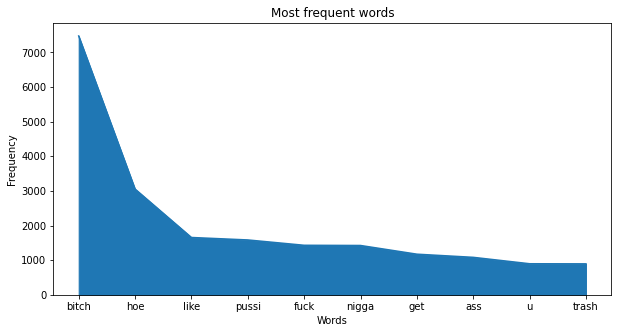

In [28]:
df_stem.plot(kind = "area",
             title = "Most frequent words", 
             legend = False,
             xlabel = "Words",
             ylabel = "Frequency",
             figsize = (10, 5))
plt.xticks(range(0,len(df_stem.index)), df_stem[0])
plt.show()

In the graph the most used words within the tweets can be seen. Now all the stopwords and uninteresting elements as well as the plurals are removed.

# Classification

After the preprocessing of the data, now a model for classifying the tweets and subsequently identify hate speech can be trained.
For this taks different models are created and trained in order to find the best performing model, which will then be used within the twitter bot.

## Data Set Preparation

In [30]:
#change elements of column from list to string
def makeString(column):
    result = " ".join(column)
    return result

In [31]:
word_stems_text = word_stems.apply(makeString)

In [32]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(word_stems_text, df["class"], test_size=0.2, shuffle=True, random_state=10)

In [33]:
#x_train_tok = [nltk.word_tokenize(i) for i in X_train]
#x_test_tok = [nltk.word_tokenize(i) for i in X_test]

In [34]:
X_train,
X_train.shape

(19826,)

In [35]:
y_train, y_train.shape

(700      0
 3015     1
 9011     0
 10395    1
 8422     2
         ..
 9372     0
 7291     1
 17728    1
 7293     2
 17673    1
 Name: class, Length: 19826, dtype: int64,
 (19826,))

In [36]:
#Benötigt von Logistic Regression
tfid = TfidfVectorizer(lowercase=False)
x_train_vec = tfid.fit_transform(X_train)
x_test_vec = tfid.transform(X_test)

In [108]:
x_train_vec

<19826x14633 sparse matrix of type '<class 'numpy.float64'>'
	with 98477 stored elements in Compressed Sparse Row format>

In [109]:
#When C < 1 --> better results
lr = LogisticRegression(solver="liblinear", penalty="l2", C=1)

In [110]:
lr.fit(x_train_vec, y_train)

LogisticRegression(C=1, solver='liblinear')

In [111]:
y_predict = lr.predict(x_test_vec)

In [112]:
y_prob = lr.predict_proba(x_test_vec)[:,1]

In [113]:
score = lr.score(x_test_vec, y_test)

In [114]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.68      0.10      0.17       285
           1       0.85      0.99      0.91      3815
           2       0.88      0.48      0.62       857

    accuracy                           0.85      4957
   macro avg       0.80      0.52      0.57      4957
weighted avg       0.84      0.85      0.82      4957

[[  28  239   18]
 [  12 3764   39]
 [   1  441  415]]
Accuracy Score: 0.8486988097639702


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (24783).

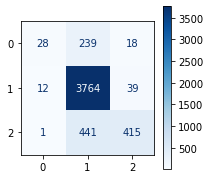

In [44]:
y_hat = np.argmax(y_predict, axis=None)

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(3,3))
cmd = ConfusionMatrixDisplay(cm, display_labels= df["class"]).plot(cmap='Blues', ax=plt.gca(), xticks_rotation=60)
plt.grid(False)
plt.show()

print(accuracy_score(test_labels, y_hat), '\n')

# Naive Bayes

In [45]:
tfid = TfidfVectorizer(lowercase=False)
x_train_vec_nn = tfid.fit_transform(X_train)
#x_test_vec = tfid.transform(X_test)

In [46]:
x_train_vec_nn

<19826x14633 sparse matrix of type '<class 'numpy.float64'>'
	with 98477 stored elements in Compressed Sparse Row format>

In [47]:
nb_tfidf = MultinomialNB(alpha=0, fit_prior=True)
nb_tfidf.fit(x_train_vec_nn, y_train)  

/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0)

In [48]:
y_predict = nb_tfidf.predict(x_test_vec)

In [49]:
print(classification_report(y_test,y_predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09       285
           1       0.82      0.96      0.89      3815
           2       0.66      0.35      0.46       857

    accuracy                           0.80      4957
   macro avg       0.61      0.45      0.48      4957
weighted avg       0.77      0.80      0.77      4957

Confusion Matrix:
[[  15  246   24]
 [  22 3665  128]
 [   8  550  299]]


# Data for Neural Networks

In [38]:
train_tweet = X_train
test_tweet = X_test

tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(train_tweet)
train_tweet = tokenizer.texts_to_sequences(train_tweet)
test_tweet = tokenizer.texts_to_sequences(test_tweet)

train_tweet = pad_sequences(train_tweet, maxlen=27)
test_tweet = pad_sequences(test_tweet, maxlen=27)

In [39]:
encoder = LabelEncoder()

y_train_categorical = encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train) 

y_test_categorical = encoder.fit_transform(y_test)
y_test_categorical = to_categorical(y_test) 

In [91]:
epoch = 10
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3)
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience = 4, factor=0.7)

callbacks=[]

# Dense Neural Network

In [122]:
y_train

700      0
3015     1
9011     0
10395    1
8422     2
        ..
9372     0
7291     1
17728    1
7293     2
17673    1
Name: class, Length: 19826, dtype: int64

In [123]:
def model_1():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    #model.add(keras.layers.LSTM(128))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

train_model_1 = model_1()

history_model_1 = train_model_1.fit(
           train_tweet,
           y_train_categorical,
           validation_data=(test_tweet,y_test_categorical),
           epochs= epoch,
           callbacks=callbacks)

Epoch 1/10
620/620 [==============================] - 15s 23ms/step - loss: 0.4970 - accuracy: 0.8305 - val_loss: 0.4354 - val_accuracy: 0.8594
Epoch 2/10
620/620 [==============================] - 14s 22ms/step - loss: 0.3786 - accuracy: 0.8772 - val_loss: 0.3982 - val_accuracy: 0.8660
Epoch 3/10
620/620 [==============================] - 13s 21ms/step - loss: 0.3145 - accuracy: 0.8957 - val_loss: 0.4181 - val_accuracy: 0.8636
Epoch 4/10
620/620 [==============================] - 13s 22ms/step - loss: 0.2714 - accuracy: 0.9121 - val_loss: 0.4549 - val_accuracy: 0.8507
Epoch 5/10
620/620 [==============================] - 14s 22ms/step - loss: 0.2467 - accuracy: 0.9202 - val_loss: 0.5057 - val_accuracy: 0.8523
Epoch 6/10
620/620 [==============================] - 14s 22ms/step - loss: 0.2294 - accuracy: 0.9255 - val_loss: 0.5489 - val_accuracy: 0.8416
Epoch 7/10
620/620 [==============================] - 14s 23ms/step - loss: 0.2184 - accuracy: 0.9291 - val_loss: 0.6189 - val_accuracy:

In [124]:
predictions1 = train_model_1.predict(test_tweet)

In [125]:
predictions1

def checkPrediction(pred):
    cleaned_prediction = []
    print(pred)
    biggest_number = 0
    to_insert = 0
    for element in pred:
        for count in range(len(element)):
            if element[count] > biggest_number:
                biggest_number = element[count]
                to_insert = count
        biggest_number = 0
        cleaned_prediction.append(to_insert)
        to_insert = 0
    return cleaned_prediction

pred_cleaned = checkPrediction(predictions1)
y_test_cleaned = checkPrediction(y_test_categorical)

[[4.2372476e-06 9.9998724e-01 8.5017309e-06]
 [3.0628985e-03 9.9693716e-01 1.7554173e-09]
 [2.8491241e-03 9.9715096e-01 3.4242662e-14]
 ...
 [4.0022549e-03 9.9551731e-01 4.8038439e-04]
 [4.4581333e-01 5.5416214e-01 2.4499152e-05]
 [6.0597225e-03 9.9393517e-01 5.1008924e-06]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [126]:
print(classification_report(y_test_cleaned, pred_cleaned))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cleaned, pred_cleaned))

              precision    recall  f1-score   support

           0       0.37      0.26      0.31       285
           1       0.86      0.96      0.90      3815
           2       0.85      0.48      0.61       857

    accuracy                           0.83      4957
   macro avg       0.69      0.57      0.61      4957
weighted avg       0.83      0.83      0.82      4957

Confusion Matrix:
[[  75  198   12]
 [  99 3653   63]
 [  28  420  409]]


In [46]:
# Das Model wird aufgebaut und auf unskalierten Daten getestet. Am Ende wird die durchschnittliche Accuracy ausgegeben
# Wie das Model genau aufgebaut wurde und wieso, wird später beschrieben
def model_2():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(352, activation='tanh'))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dropout(0.015))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

train_model_2 = model_2()

history_model_2 = train_model_2.fit(
           train_tweet,
           y_train_categorical,
           validation_data=(test_tweet,y_test_categorical),
           epochs= 30,
           callbacks=callbacks)

Epoch 1/30
620/620 [==============================] - 20s 31ms/step - loss: 0.3078 - accuracy: 0.8307 - val_loss: 0.2707 - val_accuracy: 0.8445
Epoch 2/30
620/620 [==============================] - 18s 29ms/step - loss: 0.2381 - accuracy: 0.8745 - val_loss: 0.2631 - val_accuracy: 0.8554
Epoch 3/30
620/620 [==============================] - 18s 29ms/step - loss: 0.2022 - accuracy: 0.8979 - val_loss: 0.2696 - val_accuracy: 0.8505
Epoch 4/30
620/620 [==============================] - 20s 32ms/step - loss: 0.1767 - accuracy: 0.9126 - val_loss: 0.2939 - val_accuracy: 0.8479
Epoch 5/30
620/620 [==============================] - 17s 28ms/step - loss: 0.1619 - accuracy: 0.9234 - val_loss: 0.3028 - val_accuracy: 0.8469
Epoch 6/30
620/620 [==============================] - 18s 29ms/step - loss: 0.1515 - accuracy: 0.9270 - val_loss: 0.3142 - val_accuracy: 0.8489
Epoch 7/30
620/620 [==============================] - 18s 29ms/step - loss: 0.1442 - accuracy: 0.9307 - val_loss: 0.3303 - val_accuracy:

In [47]:
predictions2 = train_model_2.predict(test_tweet)

In [48]:

predictions2

def checkPrediction(pred):
    cleaned_prediction = []
    print(pred)
    biggest_number = 0
    to_insert = 0
    for element in pred:
        for count in range(len(element)):
            if element[count] > biggest_number:
                biggest_number = element[count]
                to_insert = count
        biggest_number = 0
        cleaned_prediction.append(to_insert)
        to_insert = 0
    return cleaned_prediction

pred_cleaned2 = checkPrediction(predictions2)
y_test_cleaned = checkPrediction(y_test_categorical)

[[4.6570644e-06 9.8518777e-01 1.4807547e-02]
 [7.7709168e-02 9.2229086e-01 3.7565005e-08]
 [5.7575869e-07 9.9999940e-01 4.7147946e-13]
 ...
 [3.0829825e-02 9.6904391e-01 1.2631074e-04]
 [9.3378532e-01 6.6103868e-02 1.1090179e-04]
 [1.9471738e-05 9.9998057e-01 3.6187213e-08]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [51]:
print(classification_report(y_test_cleaned, pred_cleaned2))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cleaned, pred_cleaned2))

              precision    recall  f1-score   support

           0       0.40      0.24      0.30       285
           1       0.85      0.96      0.90      3815
           2       0.82      0.43      0.57       857

    accuracy                           0.83      4957
   macro avg       0.69      0.54      0.59      4957
weighted avg       0.82      0.83      0.81      4957

Confusion Matrix:
[[  68  199   18]
 [  83 3671   61]
 [  19  467  371]]


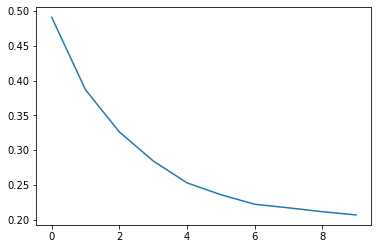

In [62]:
plt.plot(history_model_1.history["loss"])

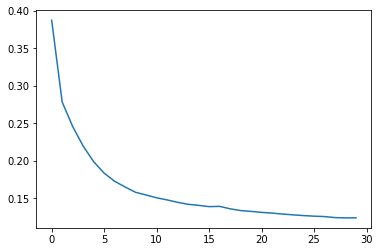

In [63]:
plt.plot(history_model_2.history["loss"])

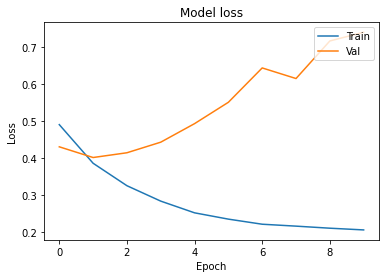

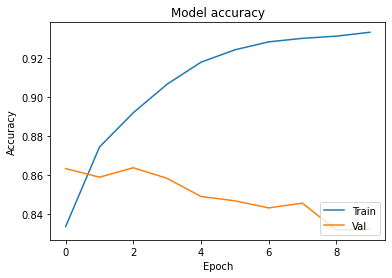

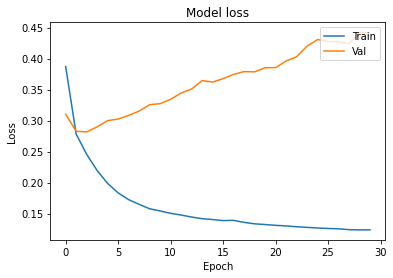

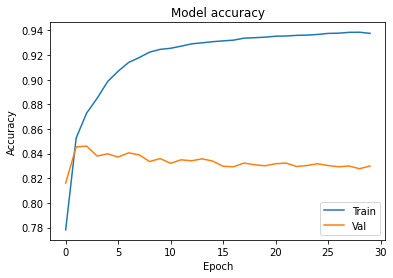

In [64]:
#Overfitting des Models wird optisch gecheckt
plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Auch die Accuracy wird optisch überprüft
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


#Overfitting des Models wird optisch gecheckt
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Auch die Accuracy wird optisch überprüft
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [68]:
score1 = train_model_1.score(y_test_cleaned, pred_cleaned)
score2 = train_model_2.score(y_test_cleaned, pred_cleaned)

ValueError: in user code:

    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/engine/training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/engine/training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/engine/training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/engine/training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kpauler/opt/anaconda3/envs/env_TextMiningTimeSeriesAnalysi/lib/python3.8/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1of input shape to have value 1728, but received input with shape (None, 64)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


In [ ]:
print(score1, score2)

## Activation Function Tuner

In [129]:
def create_model(activation = 'tanh'):

    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dense(352, activation='tanh'))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs = 20, verbose=0)

# Erstellen der Liste an Aktivierungsfunktionen, welche getestet werden soll
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

# Definieren der GridSearch und festlegen, welcher Parameter ersetzt werden soll 
param_grid = dict(activation = activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(test_tweet,y_test_categorical)

/var/folders/x0/s6sm22lj4cl3c54hdgxzzc1h0000gn/T/ipykernel_30182/3687436143.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs = 20, verbose=0)


In [130]:
# Das Ergebnis ist eine Liste aller Tests mit deren Accuracy
# Zusätzlich wird die beste Aktivierungsfunktion nochmals hervorgehoben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.803512 using {'activation': 'tanh'}
0.803111 (0.016124) with: {'activation': 'softmax'}
0.801494 (0.008189) with: {'activation': 'softplus'}
0.794839 (0.011265) with: {'activation': 'softsign'}
0.797056 (0.005381) with: {'activation': 'relu'}
0.803512 (0.007118) with: {'activation': 'tanh'}
0.801898 (0.004534) with: {'activation': 'sigmoid'}
0.803110 (0.012874) with: {'activation': 'hard_sigmoid'}
0.800285 (0.009975) with: {'activation': 'linear'}


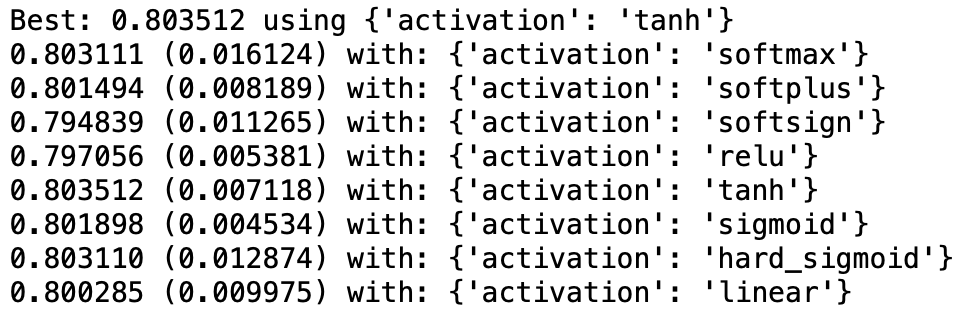

## Epochen und Batchsize Tuner

In [131]:
# Wie bekannt aus den anderen Tunern wird eine Funktion mit einem lauffähigen
# Modell definiert, welche vom Tuner aufgerufen wird
# Hierbei sind alle bisher getunten Werte natürlich eingetragen
def create_model():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dense(352, activation='tanh'))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=10)

# Definieren der Listen an Parameter und Möglichkeiten, die getestet werden sollen
epochs = [10, 20, 30]
batch_size = [155, 310, 620]

# Definieren des Tuners (GridSerach) und angeben, welche Parameter getunt werden sollen
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(test_tweet,y_test_categorical)

/var/folders/x0/s6sm22lj4cl3c54hdgxzzc1h0000gn/T/ipykernel_30182/2210739003.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=10)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [132]:
# Output ist eine Liste an Kombinationen mit Genauigkeit
# Zusätzlich wird wie bekannt die beste Kombination hervorgehoben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.808556 using {'batch_size': 620, 'epochs': 10}
0.805531 (0.012509) with: {'batch_size': 155, 'epochs': 10}
0.800689 (0.011396) with: {'batch_size': 155, 'epochs': 20}
0.795445 (0.014321) with: {'batch_size': 155, 'epochs': 30}
0.796453 (0.017520) with: {'batch_size': 310, 'epochs': 10}
0.803715 (0.010509) with: {'batch_size': 310, 'epochs': 20}
0.801696 (0.004059) with: {'batch_size': 310, 'epochs': 30}
0.808556 (0.010526) with: {'batch_size': 620, 'epochs': 10}
0.798266 (0.007527) with: {'batch_size': 620, 'epochs': 20}
0.795442 (0.005171) with: {'batch_size': 620, 'epochs': 30}


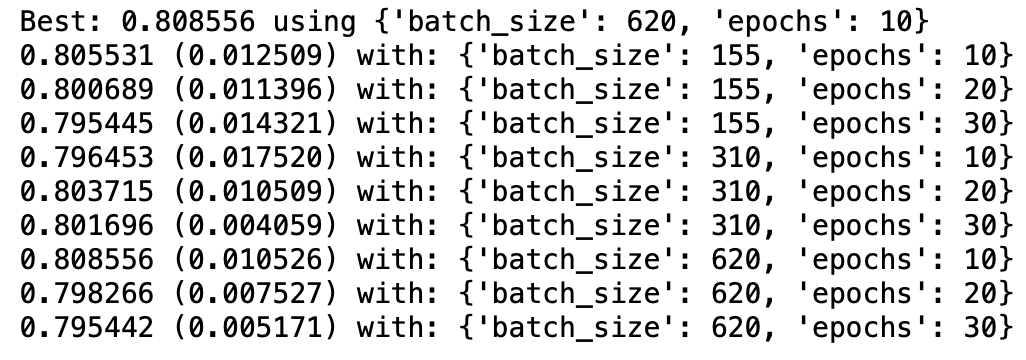

## Tuner Drop-Out Rate, Weight Constraints, Bias Constraints

In [44]:
# Definieren der Funktion und des Models, welches getestet werden soll
def create_model(dropout_rate=0.0, weight_constraint=0, bias_constraint=0):
    
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dense(352, activation='tanh',
    kernel_constraint=maxnorm(weight_constraint), bias_constraint=maxnorm(bias_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs = 10, batch_size = 620, verbose=2)

# Definieren der Listen und jeweiligen Parameter, die getestet werden sollen
weight_constraint = [0, 1, 3, 5]
bias_constraint = [0, 1, 3, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.4, 0.6]

# Definition des eigentlichen Tuners und Angabe, welche Parameter getestet werden sollen
param_grid = dict(dropout_rate = dropout_rate, weight_constraint = weight_constraint, bias_constraint = bias_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(test_tweet,y_test_categorical)

/var/folders/x0/s6sm22lj4cl3c54hdgxzzc1h0000gn/T/ipykernel_32956/584574063.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs = 10, batch_size = 620, verbose=2)


Epoch 1/10
6/6 - 6s - loss: 0.6767 - accuracy: 0.7349 - 6s/epoch - 918ms/step
Epoch 1/10
6/6 - 6s - loss: 0.6775 - accuracy: 0.7416 - 6s/epoch - 970ms/step
Epoch 1/10
6/6 - 7s - loss: 0.5558 - accuracy: 0.7570 - 7s/epoch - 1s/step
Epoch 1/10
6/6 - 7s - loss: 0.5732 - accuracy: 0.6675 - 7s/epoch - 1s/step
Epoch 1/10
6/6 - 7s - loss: 0.5908 - accuracy: 0.6465 - 7s/epoch - 1s/step
Epoch 1/10
6/6 - 7s - loss: 0.5707 - accuracy: 0.6699 - 7s/epoch - 1s/step
Epoch 1/10
6/6 - 7s - loss: 0.6811 - accuracy: 0.6629 - 7s/epoch - 1s/step
Epoch 1/10
6/6 - 8s - loss: 0.5623 - accuracy: 0.7492 - 8s/epoch - 1s/step
Epoch 2/10
6/6 - 3s - loss: 0.5873 - accuracy: 0.7760 - 3s/epoch - 571ms/step
Epoch 2/10
6/6 - 3s - loss: 0.6040 - accuracy: 0.7643 - 3s/epoch - 565ms/step
Epoch 2/10
6/6 - 3s - loss: 0.3978 - accuracy: 0.7760 - 3s/epoch - 572ms/step
Epoch 2/10
6/6 - 3s - loss: 0.4089 - accuracy: 0.7685 - 3s/epoch - 561ms/step
Epoch 2/10
6/6 - 4s - loss: 0.4093 - accuracy: 0.7643 - 4s/epoch - 601ms/step
Epoc

3/3 - 3s - loss: 0.3450 - accuracy: 0.8105 - 3s/epoch - 948ms/step


Epoch 9/10
6/6 - 3s - loss: 0.4009 - accuracy: 0.7760 - 3s/epoch - 555ms/step
3/3 - 3s - loss: 0.3804 - accuracy: 0.7864 - 3s/epoch - 945ms/step
Epoch 9/10
6/6 - 3s - loss: 0.4073 - accuracy: 0.7685 - 3s/epoch - 515ms/step
Epoch 9/10
6/6 - 3s - loss: 0.4129 - accuracy: 0.7643 - 3s/epoch - 502ms/step
Epoch 9/10
6/6 - 3s - loss: 0.2321 - accuracy: 0.8910 - 3s/epoch - 458ms/step


3/3 - 3s - loss: 0.3494 - accuracy: 0.8305 - 3s/epoch - 879ms/step


3/3 - 3s - loss: 0.3459 - accuracy: 0.8069 - 3s/epoch - 903ms/step
Epoch 10/10
6/6 - 3s - loss: 0.4013 - accuracy: 0.7760 - 3s/epoch - 453ms/step
Epoch 10/10
6/6 - 3s - loss: 0.4074 - accuracy: 0.7685 - 3s/epoch - 441ms/step
Epoch 10/10
6/6 - 2s - loss: 0.4129 - accuracy: 0.7643 - 2s/epoch - 409ms/step
Epoch 10/10
6/6 - 2s - loss: 0.2019 - accuracy: 0.8980 - 2s/epoch - 403ms/step


3/3 - 1s - loss: 0.4188 - accuracy: 0.7568 - 781ms/epoch - 260ms/step
3/3 - 1s - loss: 0.4071 - accuracy: 0.7718 - 775ms/epoch - 258ms/step


3/3 - 1s - loss: 0.3961 - accuracy: 0.7803 - 767ms/epoch - 256ms/step
3/3 - 1s - loss: 0.3684 - accuracy: 0.7998 - 758ms/epoch - 253ms/step
Epoch 1/10
6/6 - 5s - loss: 0.5835 - accuracy: 0.6654 - 5s/epoch - 828ms/step
Epoch 1/10
6/6 - 5s - loss: 0.5690 - accuracy: 0.7274 - 5s/epoch - 897ms/step
Epoch 1/10
6/6 - 6s - loss: 0.5803 - accuracy: 0.6819 - 6s/epoch - 930ms/step
Epoch 1/10
6/6 - 6s - loss: 0.5785 - accuracy: 0.6923 - 6s/epoch - 980ms/step
Epoch 2/10
6/6 - 3s - loss: 0.4098 - accuracy: 0.7685 - 3s/epoch - 467ms/step
Epoch 2/10
6/6 - 3s - loss: 0.4126 - accuracy: 0.7643 - 3s/epoch - 457ms/step
Epoch 2/10
6/6 - 4s - loss: 0.3951 - accuracy: 0.7760 - 4s/epoch - 629ms/step
Epoch 2/10
6/6 - 4s - loss: 0.4132 - accuracy: 0.7643 - 4s/epoch - 658ms/step
Epoch 1/10
6/6 - 9s - loss: 0.5930 - accuracy: 0.6390 - 9s/epoch - 2s/step
Epoch 1/10
6/6 - 9s - loss: 0.5743 - accuracy: 0.6616 - 9s/epoch - 2s/step
Epoch 1/10
6/6 - 10s - loss: 0.6064 - accuracy: 0.6463 - 10s/epoch - 2s/step
Epoch 1/1

3/3 - 3s - loss: 0.3399 - accuracy: 0.8196 - 3s/epoch - 1s/step


3/3 - 3s - loss: 0.3569 - accuracy: 0.8117 - 3s/epoch - 1s/step


3/3 - 3s - loss: 0.3805 - accuracy: 0.7967 - 3s/epoch - 1s/step


3/3 - 3s - loss: 0.3336 - accuracy: 0.8202 - 3s/epoch - 1000ms/step
Epoch 10/10
6/6 - 3s - loss: 0.1977 - accuracy: 0.9011 - 3s/epoch - 553ms/step
Epoch 10/10
6/6 - 3s - loss: 0.2069 - accuracy: 0.8953 - 3s/epoch - 558ms/step
Epoch 10/10
6/6 - 3s - loss: 0.2097 - accuracy: 0.8941 - 3s/epoch - 540ms/step
Epoch 10/10
6/6 - 3s - loss: 0.1975 - accuracy: 0.8989 - 3s/epoch - 525ms/step


3/3 - 1s - loss: 0.3464 - accuracy: 0.8081 - 774ms/epoch - 258ms/step
3/3 - 1s - loss: 0.3585 - accuracy: 0.8016 - 805ms/epoch - 268ms/step


3/3 - 1s - loss: 0.3391 - accuracy: 0.8178 - 837ms/epoch - 279ms/step
3/3 - 1s - loss: 0.3823 - accuracy: 0.7954 - 813ms/epoch - 271ms/step
Epoch 1/10
6/6 - 5s - loss: 0.6773 - accuracy: 0.6778 - 5s/epoch - 833ms/step
Epoch 1/10
6/6 - 5s - loss: 0.6792 - accuracy: 0.6755 - 5s/epoch - 837ms/step
Epoch 1/10
6/6 - 6s - loss: 0.6758 - accuracy: 0.7262 - 6s/epoch - 955ms/step
Epoch 1/10
6/6 - 6s - loss: 0.5796 - accuracy: 0.6985 - 6s/epoch - 1s/step
Epoch 2/10
6/6 - 4s - loss: 0.5891 - accuracy: 0.7643 - 4s/epoch - 623ms/step
Epoch 2/10
6/6 - 4s - loss: 0.5919 - accuracy: 0.7760 - 4s/epoch - 650ms/step
Epoch 2/10
6/6 - 5s - loss: 0.5942 - accuracy: 0.7685 - 5s/epoch - 774ms/step
Epoch 2/10
6/6 - 4s - loss: 0.4025 - accuracy: 0.7760 - 4s/epoch - 744ms/step
Epoch 1/10
6/6 - 10s - loss: 0.6009 - accuracy: 0.6599 - 10s/epoch - 2s/step
Epoch 1/10
6/6 - 10s - loss: 0.5882 - accuracy: 0.6629 - 10s/epoch - 2s/step
Epoch 1/10
6/6 - 11s - loss: 0.5735 - accuracy: 0.7026 - 11s/epoch - 2s/step
Epoch 1/

In [45]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812994 using {'bias_constraint': 3, 'dropout_rate': 0.0, 'weight_constraint': 1}
0.769621 (0.009700) with: {'bias_constraint': 0, 'dropout_rate': 0.0, 'weight_constraint': 0}
0.809968 (0.006407) with: {'bias_constraint': 0, 'dropout_rate': 0.0, 'weight_constraint': 1}
0.804521 (0.007409) with: {'bias_constraint': 0, 'dropout_rate': 0.0, 'weight_constraint': 3}
0.803716 (0.014945) with: {'bias_constraint': 0, 'dropout_rate': 0.0, 'weight_constraint': 5}
0.769621 (0.009700) with: {'bias_constraint': 0, 'dropout_rate': 0.1, 'weight_constraint': 0}
0.807345 (0.014249) with: {'bias_constraint': 0, 'dropout_rate': 0.1, 'weight_constraint': 1}
0.804321 (0.017664) with: {'bias_constraint': 0, 'dropout_rate': 0.1, 'weight_constraint': 3}
0.808556 (0.009616) with: {'bias_constraint': 0, 'dropout_rate': 0.1, 'weight_constraint': 5}
0.769621 (0.009700) with: {'bias_constraint': 0, 'dropout_rate': 0.2, 'weight_constraint': 0}
0.806942 (0.009977) with: {'bias_constraint': 0, 'dropout_rate': 

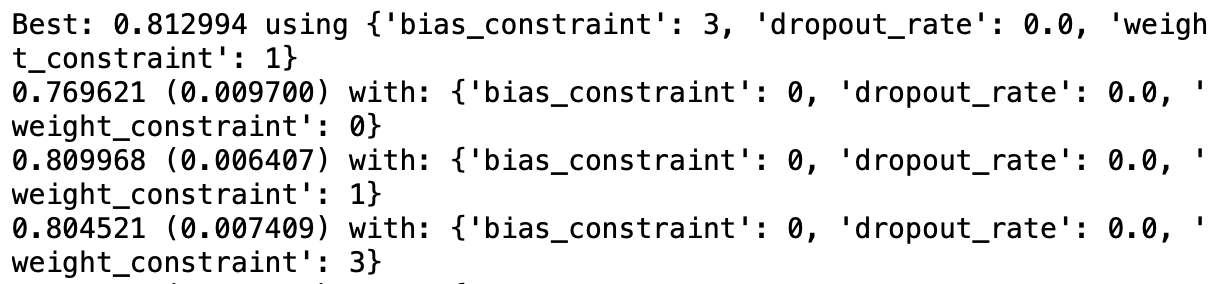

In [67]:
# Das Model wird aufgebaut und auf unskalierten Daten getestet. Am Ende wird die durchschnittliche Accuracy ausgegeben
# Wie das Model genau aufgebaut wurde und wieso, wird später beschrieben
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=150)

def model_2():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dense(352, activation='tanh', kernel_constraint=maxnorm(1), bias_constraint=maxnorm(3)))
    model.add(Dropout(0.0))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

train_model_2 = model_2()

history_model_2 = train_model_2.fit(
           train_tweet,
           y_train_categorical,
           validation_data=(test_tweet,y_test_categorical),
           epochs= 50,
            batch_size = 620,
           callbacks=cal)

Epoch 1/50
32/32 [==============================] - 6s 135ms/step - loss: 0.4138 - accuracy: 0.7740 - val_loss: 0.3460 - val_accuracy: 0.7811
Epoch 2/50
32/32 [==============================] - 4s 122ms/step - loss: 0.2951 - accuracy: 0.8385 - val_loss: 0.2972 - val_accuracy: 0.8376
Epoch 3/50
32/32 [==============================] - 4s 123ms/step - loss: 0.2453 - accuracy: 0.8743 - val_loss: 0.2948 - val_accuracy: 0.8368
Epoch 4/50
32/32 [==============================] - 4s 124ms/step - loss: 0.2213 - accuracy: 0.8853 - val_loss: 0.3112 - val_accuracy: 0.8311
Epoch 5/50
32/32 [==============================] - 4s 123ms/step - loss: 0.2019 - accuracy: 0.8955 - val_loss: 0.3196 - val_accuracy: 0.8372
Epoch 6/50
32/32 [==============================] - 4s 123ms/step - loss: 0.1874 - accuracy: 0.9068 - val_loss: 0.3087 - val_accuracy: 0.8366
Epoch 7/50
32/32 [==============================] - 4s 124ms/step - loss: 0.1732 - accuracy: 0.9164 - val_loss: 0.3117 - val_accuracy: 0.8364
Epoch 

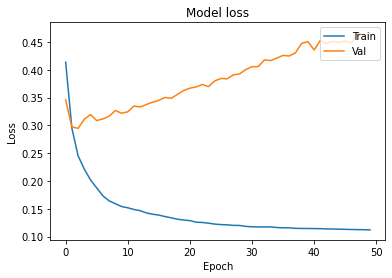

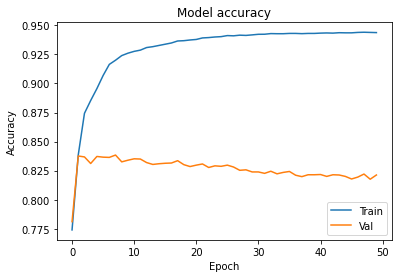

In [68]:
#Overfitting des Models wird optisch gecheckt
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Auch die Accuracy wird optisch überprüft
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [69]:
predictions2 = train_model_2.predict(test_tweet)
predictions2

def checkPrediction(pred):
    cleaned_prediction = []
    print(pred)
    biggest_number = 0
    to_insert = 0
    for element in pred:
        for count in range(len(element)):
            if element[count] > biggest_number:
                biggest_number = element[count]
                to_insert = count
        biggest_number = 0
        cleaned_prediction.append(to_insert)
        to_insert = 0
    return cleaned_prediction

pred_cleaned2 = checkPrediction(predictions2)
y_test_cleaned = checkPrediction(y_test_categorical)

[[1.0600821e-08 9.9666661e-01 3.3334137e-03]
 [9.9576110e-01 4.2228205e-03 1.6183732e-05]
 [3.4620555e-09 1.0000000e+00 8.1223866e-14]
 ...
 [2.8161806e-04 9.9965036e-01 6.8004643e-05]
 [3.1020198e-05 9.9995494e-01 1.4121911e-05]
 [1.1646346e-05 9.9998796e-01 3.2040418e-07]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [70]:
print(classification_report(y_test_cleaned, pred_cleaned2))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cleaned, pred_cleaned2))

              precision    recall  f1-score   support

           0       0.40      0.18      0.25       285
           1       0.85      0.95      0.90      3815
           2       0.72      0.46      0.56       857

    accuracy                           0.82      4957
   macro avg       0.66      0.53      0.57      4957
weighted avg       0.80      0.82      0.80      4957

Confusion Matrix:
[[  52  203   30]
 [  65 3629  121]
 [  13  454  390]]


# Custom Weights

In [71]:
custom_weights = class_weight.compute_class_weight(
                        class_weight = 'balanced', 
                        classes = np.unique(y_train), 
                        y = y_train)
print(custom_weights)

[5.77176128 0.42983198 1.99899173]


In [72]:
def custom_weights_to_dictionary(weights):
    dic = {}
    for i in range(len(weights)):
        dic[i] = weights[i]
    return dic

weights = custom_weights_to_dictionary(custom_weights)
print(weights)

{0: 5.771761280931587, 1: 0.4298319783197832, 2: 1.9989917322040733}


In [73]:
def model_2():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(352, activation='tanh'))
    model.add(keras.layers.Dense(224, activation='tanh'))
    model.add(keras.layers.Dropout(0.015))
    model.add(keras.layers.Dense(32, activation='tanh'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='nadam', metrics=['accuracy'])
    return model

train_model_2 = model_2()

history_model_2 = train_model_2.fit(
                   train_tweet,
                   y_train_categorical,
                   validation_data=(test_tweet,y_test_categorical),
                   class_weight=weights,
                   epochs= 30,
                   callbacks=callbacks)

Epoch 1/30
620/620 [==============================] - 19s 29ms/step - loss: 0.5235 - accuracy: 0.6131 - val_loss: 0.4032 - val_accuracy: 0.8253
Epoch 2/30
620/620 [==============================] - 17s 28ms/step - loss: 0.4016 - accuracy: 0.7034 - val_loss: 0.4852 - val_accuracy: 0.7505
Epoch 3/30
620/620 [==============================] - 16s 25ms/step - loss: 0.3314 - accuracy: 0.7459 - val_loss: 0.4456 - val_accuracy: 0.7843
Epoch 4/30
620/620 [==============================] - 17s 27ms/step - loss: 0.2892 - accuracy: 0.7718 - val_loss: 0.3969 - val_accuracy: 0.8241
Epoch 5/30
620/620 [==============================] - 17s 27ms/step - loss: 0.2642 - accuracy: 0.7829 - val_loss: 0.4359 - val_accuracy: 0.5881
Epoch 6/30
620/620 [==============================] - 16s 26ms/step - loss: 0.2445 - accuracy: 0.8039 - val_loss: 0.4370 - val_accuracy: 0.6339
Epoch 7/30
620/620 [==============================] - 16s 26ms/step - loss: 0.2348 - accuracy: 0.8112 - val_loss: 0.4836 - val_accuracy:

In [74]:
predictions = train_model_2.predict(test_tweet)

pred_cleaned = checkPrediction(predictions)

print(classification_report(y_test_cleaned, pred_cleaned))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cleaned, pred_cleaned))

[[1.2741028e-06 7.0987594e-01 2.9012278e-01]
 [2.3594169e-01 7.6405823e-01 1.2369976e-07]
 [1.4279482e-09 1.0000000e+00 5.2302249e-13]
 ...
 [5.9791360e-02 9.3838352e-01 1.8251197e-03]
 [9.9886668e-01 1.1309615e-03 2.3854218e-06]
 [9.6136987e-01 3.8626146e-02 4.0343762e-06]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       285
           1       0.90      0.62      0.73      3815
           2       0.33      0.78      0.46       857

    accuracy                           0.63      4957
   macro avg       0.50      0.56      0.49      4957
weighted avg       0.76      0.63      0.66      4957

Confusion Matrix:
[[  82  109   94]
 [ 176 2355 1284]
 [  28  158  671]]


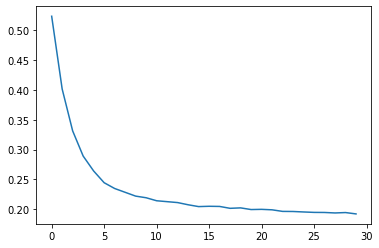

In [75]:
plt.plot(history_model_2.history["loss"])

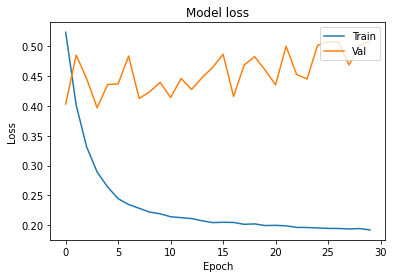

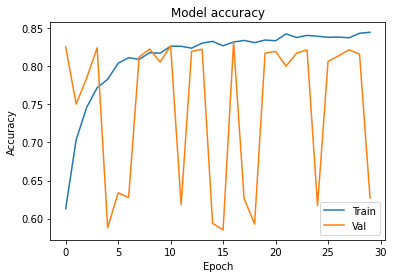

In [76]:
#Overfitting des Models wird optisch gecheckt
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Auch die Accuracy wird optisch überprüft
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# CNN

In [69]:
def model_3():
    model = Sequential()
    model.add(keras.layers.Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length = 27))
    #model.add(keras.layers.LSTM(128, input_shape=((128,7),)))
    model.add(keras.layers.Conv1D(128, 5, activation='relu'))
    #model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(128, 5, activation='relu'))
    #model.add(keras.layers.MaxPooling1D(pool_size=1))
    model.add(keras.layers.Conv1D(128, 5, activation='relu'))
    model.add(keras.layers.GlobalAveragePooling1D())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    #model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

train_model_3 = model_3()
#train_tweet_pd = pd.DataFrame(train_tweet)
history_model_3 = train_model_3.fit(
                   train_tweet,
                   y_train_categorical,
                   validation_data=(test_tweet, y_test_categorical),
                   class_weight=weights,
                   epochs=epoch,
                   callbacks=callbacks)

NameError: name 'weights' is not defined

In [ ]:
predictions = train_model_3.predict(test_tweet)

pred_cleaned = checkPrediction(predictions)

print(classification_report(y_test_cleaned, pred_cleaned))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cleaned, pred_cleaned))

## Classification without word stems

Since hate speech often can only be detected within context, we want to analyze if there is any difference in the model performance between using the real tweets and using the tweets with the contained words only in singular, as was done so far. 

## Hate Speech Commonalities

Following we try to find some commonalities between the hate speech tweets, in order to more easily classify them in the future. First we want to look at the average lenght of the hate speech tweets comporaded to other ones.

## Classification with entire tweets

So far we have used only single words for the identification of hate speech. However, often an accurate identification of hate speech can only be done in regards to the context of the message or conversation. Therefore in the following the entire tweets will be classified with the model identified so far. 